In [7]:
# Elastic net regression
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_csv('Student_Performance.csv')
# Generating synthetic data for regression
y = data['Performance_Index']
X = data.drop(['Performance_Index'],axis=1)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Elastic Net model
# Here, alpha is the constant that multiplies the penalty terms and l1_ratio is the ElasticNet mixing parameter
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Fitting the model
elastic_net.fit(X_train, y_train)

# Predicting
y_pred = elastic_net.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(elastic_net.coef_)

Mean Squared Error: 4.878129999104696
[2.58817983 1.01336839 0.         0.25817437 0.12659703]


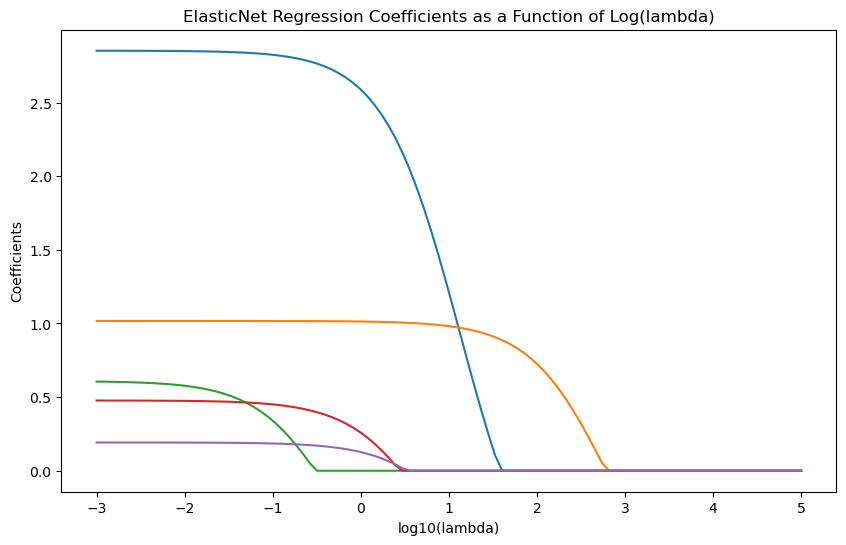

In [6]:
import matplotlib.pyplot as plt
alpha_values = 10**np.linspace(-3, 5, 100)
coefs = []
for alpha in alpha_values:
    EN = ElasticNet(alpha=alpha)
    EN.fit(X_train, y_train)
    coefs.append(EN.coef_.ravel())

plt.figure(figsize=(10, 6))
plt.plot(np.log10(alpha_values), coefs)
plt.xlabel('log10(lambda)')
plt.ylabel('Coefficients')
plt.title('ElasticNet Regression Coefficients as a Function of Log(lambda)')
plt.axis('tight')
plt.show()